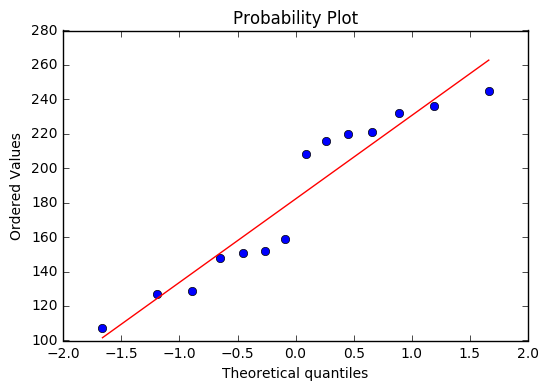

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

d = [216, 107, 152, 236, 127, 208, 232, 220, 245, 151, 221, 148, 129, 159]
stats.probplot(d, plot=plt)
plt.show()

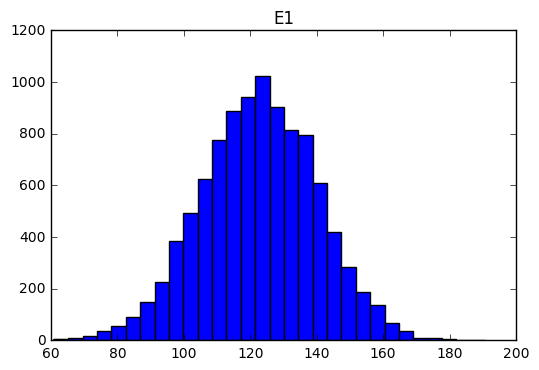

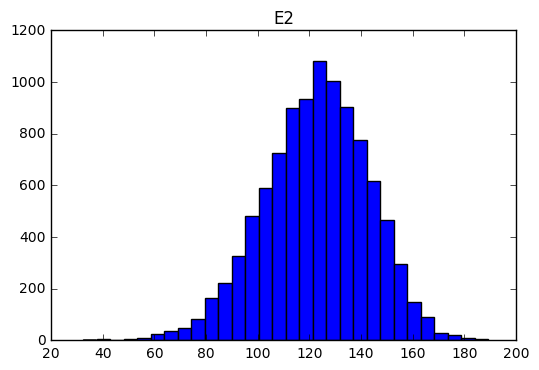

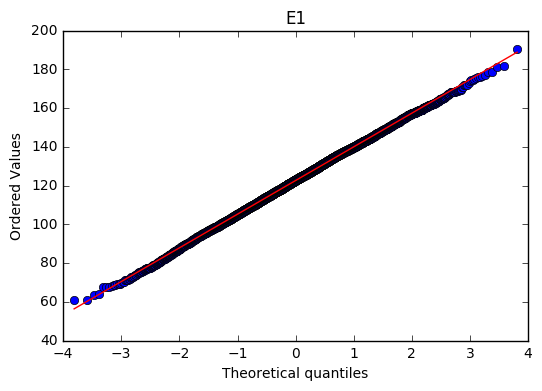

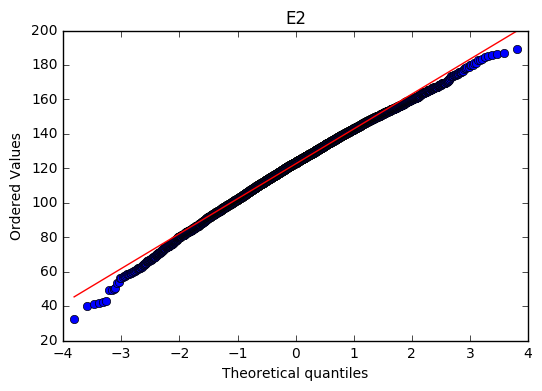

(<matplotlib.text.Text at 0x1104e0ef0>, None)

In [147]:
x = np.mean(d)
s = np.std(d, ddof=1)
N = np.random.normal(x, s, (10000, 14))

np.savetxt("simulateddata.csv", N, delimiter=",")

pct = [100 * (i + 1 - 0.5) / len(d) for i in range(len(d))]

def E1(arr):
    return np.mean(arr) - 1.28 * np.std(arr, ddof=1)

def E2(arr):
    interp = np.interp(10, pct, sorted(arr))
    return interp

E1_ = [E1(a) for a in N]
E2_ = [E2(a) for a in N]

plt.hist(E1_, bins=30)
plt.title("E1"), plt.show()
plt.hist(E2_, bins=30)
plt.title("E2"), plt.show()

stats.probplot(E1_, plot=plt)
plt.title("E1"), plt.show()
stats.probplot(E2_, plot=plt)
plt.title("E2"), plt.show()

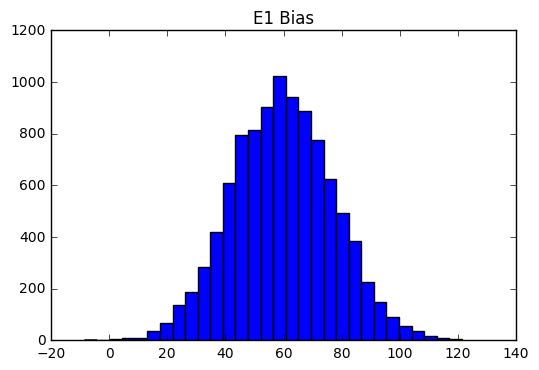

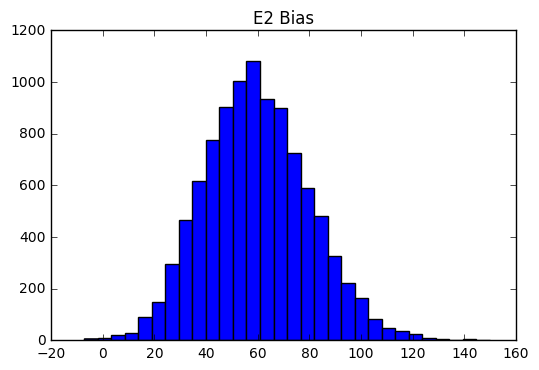

(3858.5106830512404, 3970.566470657614)

In [157]:
# Bias
E1_Bias = [np.mean(d) - E1(a) for a in N]
E2_Bias = [np.mean(d) - E2(a) for a in N]

plt.hist(E1_Bias, bins=30)
plt.title("E1 Bias"), plt.show()
plt.hist(E2_Bias, bins=30)
plt.title("E2 Bias"), plt.show()
(np.median(E1_Bias), E2_Bias)

# Mean Squared Error
MSE_E1 = np.mean([(E1_Bias[i] ** 2) for i in range(len(E1_Bias))])
MSE_E2 = np.mean([(E2_Bias[i] ** 2) for i in range(len(E2_Bias))])
(MSE_E1, MSE_E2)

In [158]:
# Intervals
s1 = np.std(E1_, ddof=1)
interv = [E1(d) - 2 * s1, E1(d) + 2 * s1]
interv
s2 = np.std(E2_, ddof=1)
s1, s2

(17.379749858830714, 20.295619459391943)